<a href="https://colab.research.google.com/github/SujayVivek/TradingStrategies/blob/main/SimpleMovingAverage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files
files.upload()

Saving NIFTY 50-31-12-2021-to-30-12-2022.csv to NIFTY 50-31-12-2021-to-30-12-2022 (1).csv


{'NIFTY 50-31-12-2021-to-30-12-2022 (1).csv': b'\xef\xbb\xbfDate ,Open ,High ,Low ,Close ,Shares Traded ,Turnover (\xe2\x82\xb9 Cr)\n31-DEC-2021,17244.5,17400.8,17238.5,17354.05,167025720,14588.54\n03-JAN-2022,17387.15,17646.65,17383.3,17625.7,200456430,16181.36\n04-JAN-2022,17681.4,17827.6,17593.55,17805.25,247437472,18604.16\n05-JAN-2022,17820.1,17944.7,17748.85,17925.25,251460038,23737.31\n06-JAN-2022,17768.5,17797.95,17655.55,17745.9,236454824,22643.82\n07-JAN-2022,17797.6,17905,17704.55,17812.7,239338015,21447.89\n10-JAN-2022,17913.3,18017.45,17879.15,18003.3,232418075,20853.64\n11-JAN-2022,17997.75,18081.25,17964.4,18055.75,220238796,20781.46\n12-JAN-2022,18170.4,18227.95,18128.8,18212.35,244974287,22298.69\n13-JAN-2022,18257,18272.25,18163.8,18257.8,303700545,28670.93\n14-JAN-2022,18185,18286.95,18119.65,18255.75,229451608,21024.51\n17-JAN-2022,18235.65,18321.55,18228.75,18308.1,266702919,23859.38\n18-JAN-2022,18337.2,18350.95,18085.9,18113.05,227507319,20852.67\n19-JAN-2022,181

In [ ]:
df = pd.read_csv('NIFTY 50-31-12-2021-to-30-12-2022.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,31-DEC-2021,17244.50,17400.80,17238.50,17354.05,167025720,14588.54
1,03-JAN-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36
2,04-JAN-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16
3,05-JAN-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31
4,06-JAN-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82


In [ ]:
# Set the date as the index
df= df.set_index(pd.DatetimeIndex(df['Date '].values))

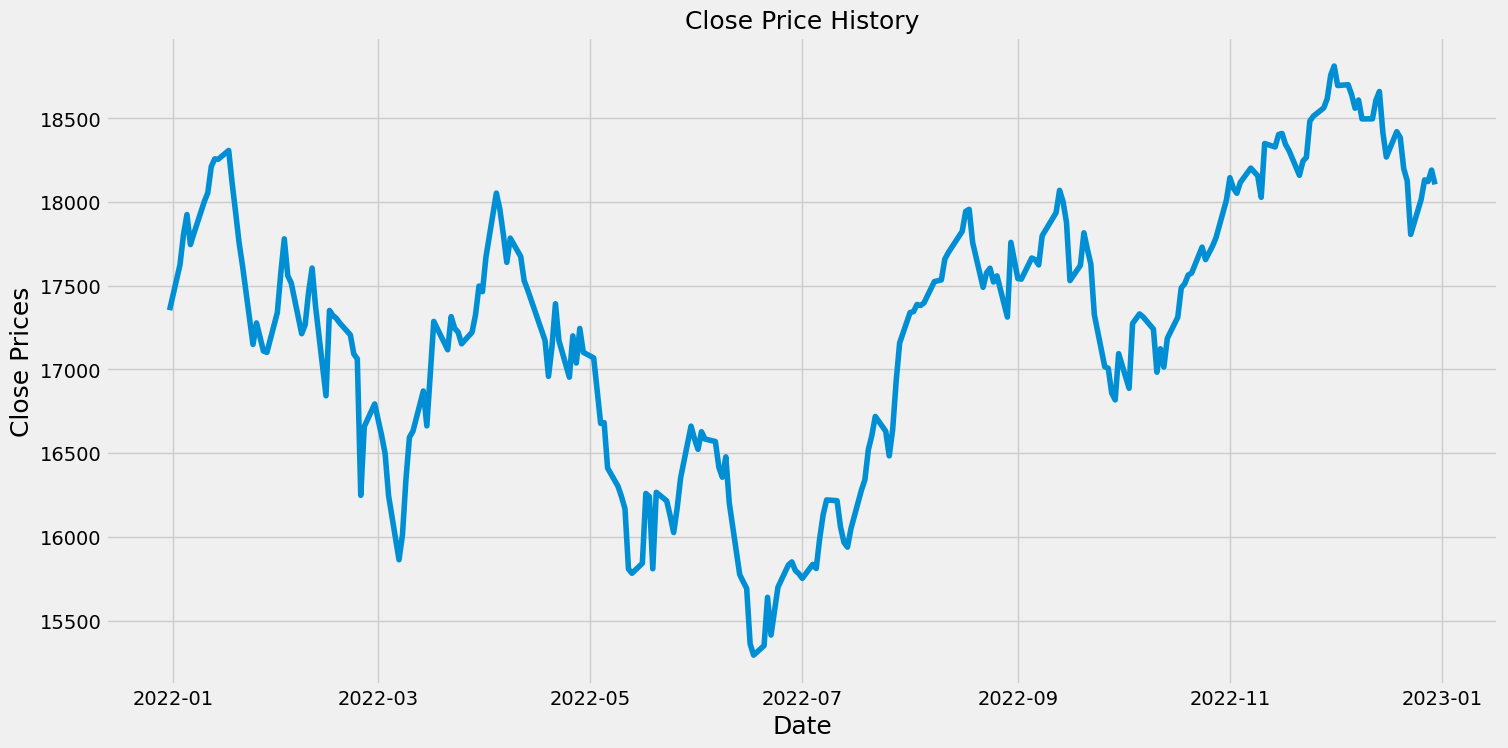

In [ ]:
#visually show the close price

plt.figure(figsize= (16,8))
plt.title('Close Price History', fontsize= 18)
plt.plot(df['Close '])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Prices', fontsize= 18)
plt.show()

In [ ]:
#create a function to calculate the Simple Moving Average SMA

def SMA(data, period = 30, column= 'Close '):
  return data[column].rolling(window= period).mean()

In [ ]:
#columns to store the 20 day and 50 day averages

df['SM20']= SMA(df,20)
df['SM50']= SMA(df,50)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),SM20,SM50
2021-12-31,31-DEC-2021,17244.50,17400.80,17238.50,17354.05,167025720,14588.54,NaN,NaN
2022-01-03,03-JAN-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36,NaN,NaN
2022-01-04,04-JAN-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16,NaN,NaN
2022-01-05,05-JAN-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31,NaN,NaN
2022-01-06,06-JAN-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,NaN,NaN


In [ ]:
#Get the buy and sell signals
df['Signal'] = np.where(df['SM20'] > df['SM50'], 1, 0)
df['Position'] = df['Signal'].diff();#this will contain either 0-1=-1, 1-0=1, 0-0=0 or 1-1=0

# if 1, then its a buy signal

df['Buy']= np.where(df['Position']==1, df['Close '], np.NAN)
df['Sell']= np.where(df['Position']==1, df['Close '], np.NAN)

df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),SM20,SM50,Signal,Position,Buy,Sell
2021-12-31,31-DEC-2021,17244.50,17400.80,17238.50,17354.05,167025720,14588.54,NaN,NaN,0,NaN,NaN,NaN
2022-01-03,03-JAN-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36,NaN,NaN,0,0.0,NaN,NaN
2022-01-04,04-JAN-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16,NaN,NaN,0,0.0,NaN,NaN
2022-01-05,05-JAN-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31,NaN,NaN,0,0.0,NaN,NaN
2022-01-06,06-JAN-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82,NaN,NaN,0,0.0,NaN,NaN


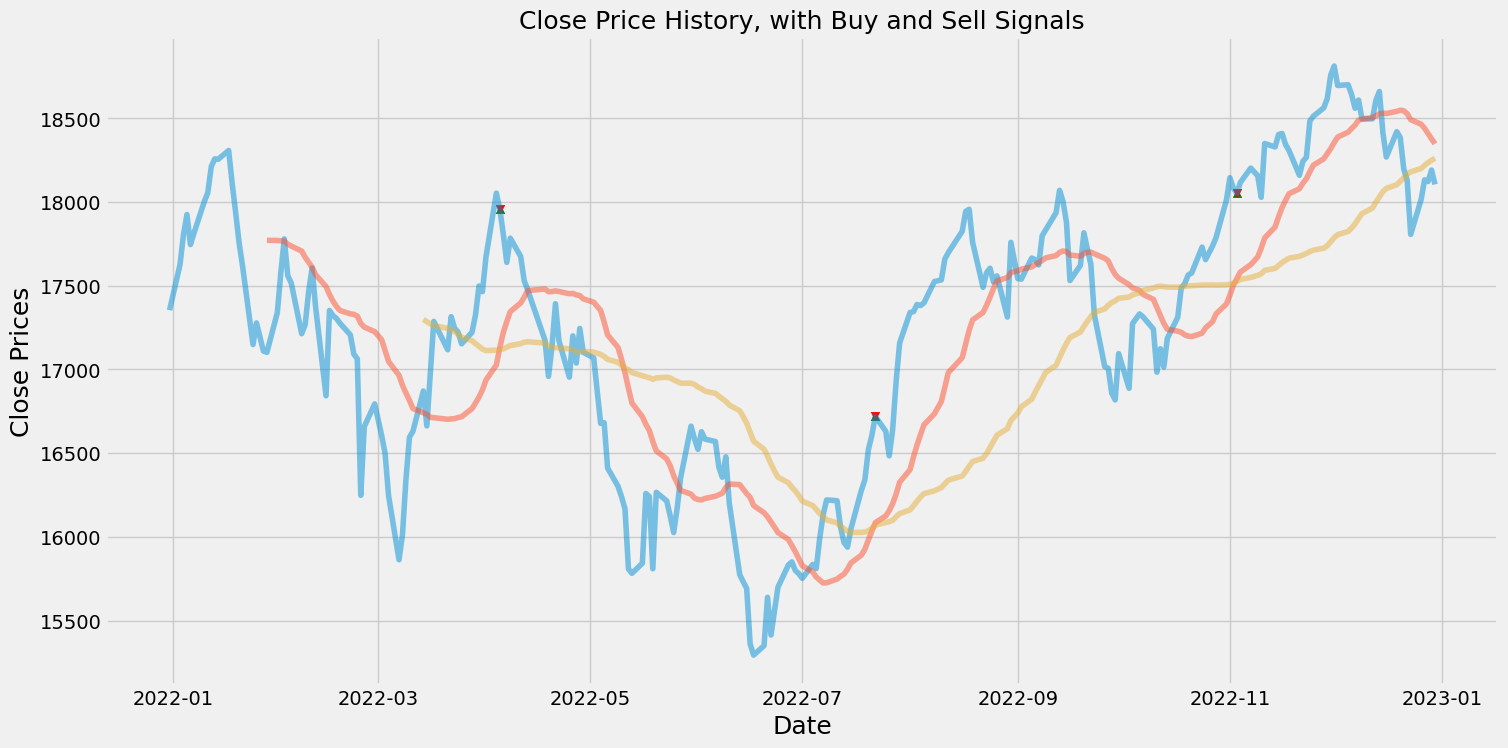

In [ ]:
#visually show close price with SMAs, with buy and sell signals

plt.figure(figsize= (16,8))
plt.title('Close Price History, with Buy and Sell Signals', fontsize= 18)
plt.plot(df['Close '], alpha = 0.5, label= 'Close ')
plt.plot(df['SM20'], alpha = 0.5, label= 'SMA20')
plt.plot(df['SM50'], alpha = 0.5, label= 'SMA50')
plt.scatter(df.index, df['Buy'], alpha = 1, label = 'Buy Signal', marker= '^', color='green')
plt.scatter(df.index, df['Sell'], alpha = 1, label = 'Sell Signal', marker= 'v', color='red')

plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Prices', fontsize= 18)
plt.show()